In [1]:
# 1 ???

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("ab_browser_test.csv").set_index(["userID", "browser"])
data.head()

,,slot,n_clicks,n_queries,n_nonclk_queries
userID,browser,,,,
1,Browser #2,exp,23,32,19
3,Browser #4,exp,3,4,2
5,Browser #4,exp,29,35,16
6,Browser #4,control,12,6,0
7,Browser #4,exp,54,68,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 566134 entries, (1, Browser #2) to (603137, Browser #2)
Data columns (total 4 columns):
slot                566134 non-null object
n_clicks            566134 non-null int64
n_queries           566134 non-null int64
n_nonclk_queries    566134 non-null int64
dtypes: int64(3), object(1)
memory usage: 24.3+ MB


In [4]:
exp = data[data.slot == "exp"]
control = data[data.slot == "control"]

In [96]:
round((exp.n_clicks.sum() / control.n_clicks.sum() - 1) * 100, 3)

1.614

In [7]:
# 2

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [7]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [8]:
import numpy as np

In [9]:
np.random.seed(0)
exp_sample = get_bootstrap_samples(exp.n_clicks.values, 1000)
control_sample = get_bootstrap_samples(control.n_clicks.values, 1000)

In [10]:
stat_intervals(np.median(exp_sample, axis=1) - np.median(control_sample, axis=1), 0.05)

array([1., 1.])

In [11]:
stat_intervals(np.mean(exp_sample, axis=1) - np.mean(control_sample, axis=1), 0.05)

array([0.19172563, 0.40475697])

In [12]:
# 3

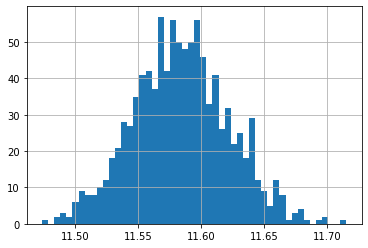

In [13]:
pd.Series(np.mean(exp_sample, axis=1)).hist(bins=50)

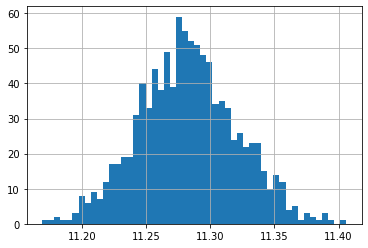

In [14]:
pd.Series(np.mean(control_sample, axis=1)).hist(bins=50)

In [15]:
# 4

In [33]:
np.random.seed(0)
control_sample = get_bootstrap_samples(control.n_clicks.values, 500)

In [34]:
control_mean = np.mean(control_sample, axis=1)

In [35]:
control_boot_chi_squared = np.sum((control_sample - control_mean.reshape(-1, 1)) ** 2, axis=1)

In [28]:
from scipy import stats
import matplotlib.pyplot as plt

0.9959537742082024

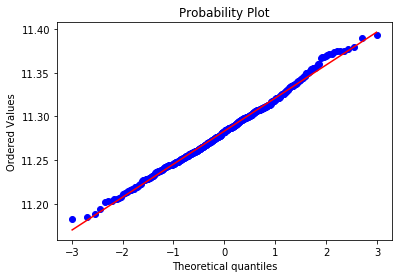

In [39]:
_, rez = stats.probplot(control_mean, plot=plt)
rez[2] ** 2

0.9972851721676725

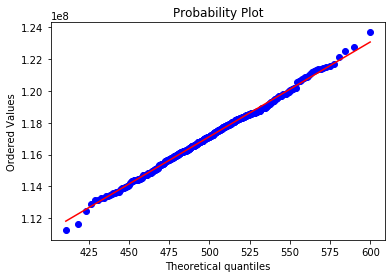

In [40]:
_, rez = stats.probplot(control_boot_chi_squared, dist="chi2", sparams=len(control_boot_chi_squared - 1), plot=plt)
rez[2] ** 2

In [41]:
# 5

In [53]:
stats.mannwhitneyu(exp.groupby("userID").n_clicks.sum(), control.groupby("userID").n_clicks.sum())

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [54]:
# 6

In [82]:
browers = set(exp.reset_index().browser)
browers

{'Browser #14',
 'Browser #17',
 'Browser #2',
 'Browser #20',
 'Browser #22',
 'Browser #4'}

In [93]:
rez = []
for br in browers:
    print(br)
    rez.append(stats.mannwhitneyu(exp.loc[(slice(None), br), "n_clicks"], control.loc[(slice(None), br), "n_clicks"]).pvalue)
rez

Browser #14
Browser #22
Browser #17
Browser #2
Browser #4
Browser #20


[0.0,
 0.2574055152210032,
 0.03740060143010802,
 0.0272438604197241,
 0.40760617658454984,
 0.45366656388735377]

In [84]:
import statsmodels.stats.multitest as smm

In [85]:
sum(1 - smm.multipletests(rez, 0.05, method="holm")[0])

5

In [76]:
# 7 ???

In [94]:
for br in browers:
    up_exp, down_exp = exp.loc[(slice(None), br), ["n_nonclk_queries", "n_queries"]].sum()
    up_control, down_control = control.loc[(slice(None), br), ["n_nonclk_queries", "n_queries"]].sum()
    print(br, up_exp / down_exp * 100, up_control / down_control * 100, up_exp / down_exp * 100 - up_control / down_control * 100)

Browser #14 43.755617361273295 57.59041136008114 -13.834793998807847
Browser #22 39.85394721969546 40.593976593513354 -0.7400293738178902
Browser #17 36.93741284866483 36.29936674628208 0.6380461023827451
Browser #2 44.982746948554706 45.96274717919465 -0.9800002306399449
Browser #4 45.14294190358467 46.97092963514274 -1.8279877315580677
Browser #20 38.97737648371716 40.540484743383296 -1.5631082596661372
